<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Quantum_MultiQubit_BlochSphereX_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=419872d2be0a97e2ecde8d23895447a207032a6c13fa8bfb5672b06ad66ee1e5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.7 MB/s eta 0:00:00


In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere, array_to_latex

from qiskit_aer import Aer, StatevectorSimulator, qasm_simulator, UnitarySimulator
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

from qiskit.primitives import Sampler, Estimator

In [36]:
qc = QuantumCircuit(1, 1)
qc.reset(0)
state_before = Statevector.from_instruction(qc)

In [37]:
state_before

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


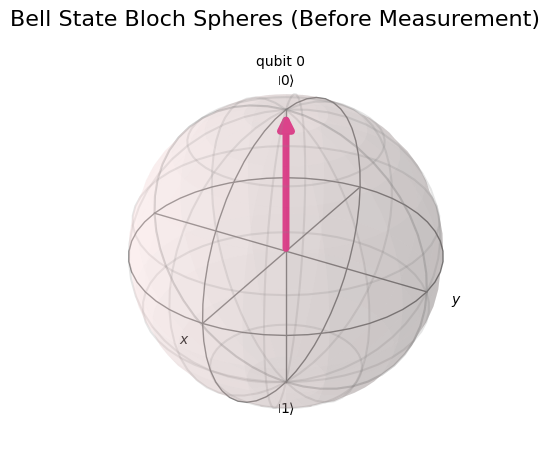

In [59]:
plot_bloch_multivector(state_before, title="Bell State Bloch Spheres (Before Measurement)")

In [60]:
qc.h(0)  # 첫 번째 큐비트에 Hadamard 게이트 적용

# 수행 전 상태 벡터 계산
state_before = Statevector.from_instruction(qc)

In [40]:
state_before

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


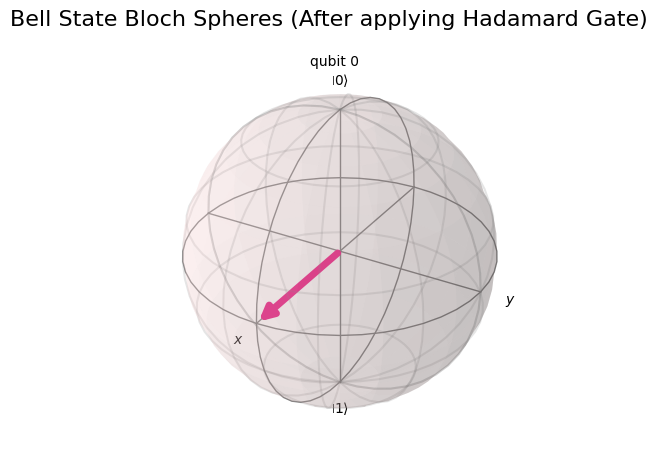

In [111]:
plot_bloch_multivector(state_before, title="Bell State Bloch Spheres (After applying Hadamard Gate)")

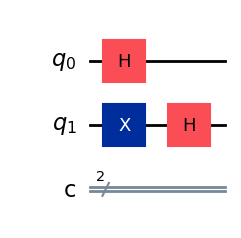

In [112]:
qc3 = QuantumCircuit(2, 2)
qc3.h(0)
qc3.x(1)
qc3.h(1)
qc3.draw('mpl')

In [115]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state3 = statevector_backend.run(qc3, shots=1024).result().get_statevector()

In [116]:
latex2 = array_to_latex(final_state3, precision=1)
display(latex2)


<IPython.core.display.Latex object>

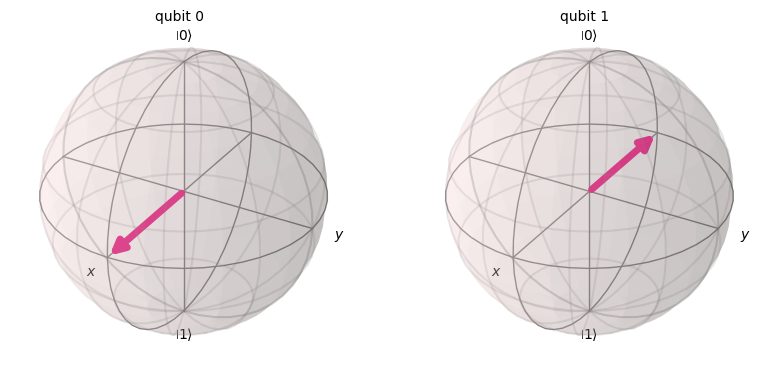

In [117]:
plot_bloch_multivector(final_state3)

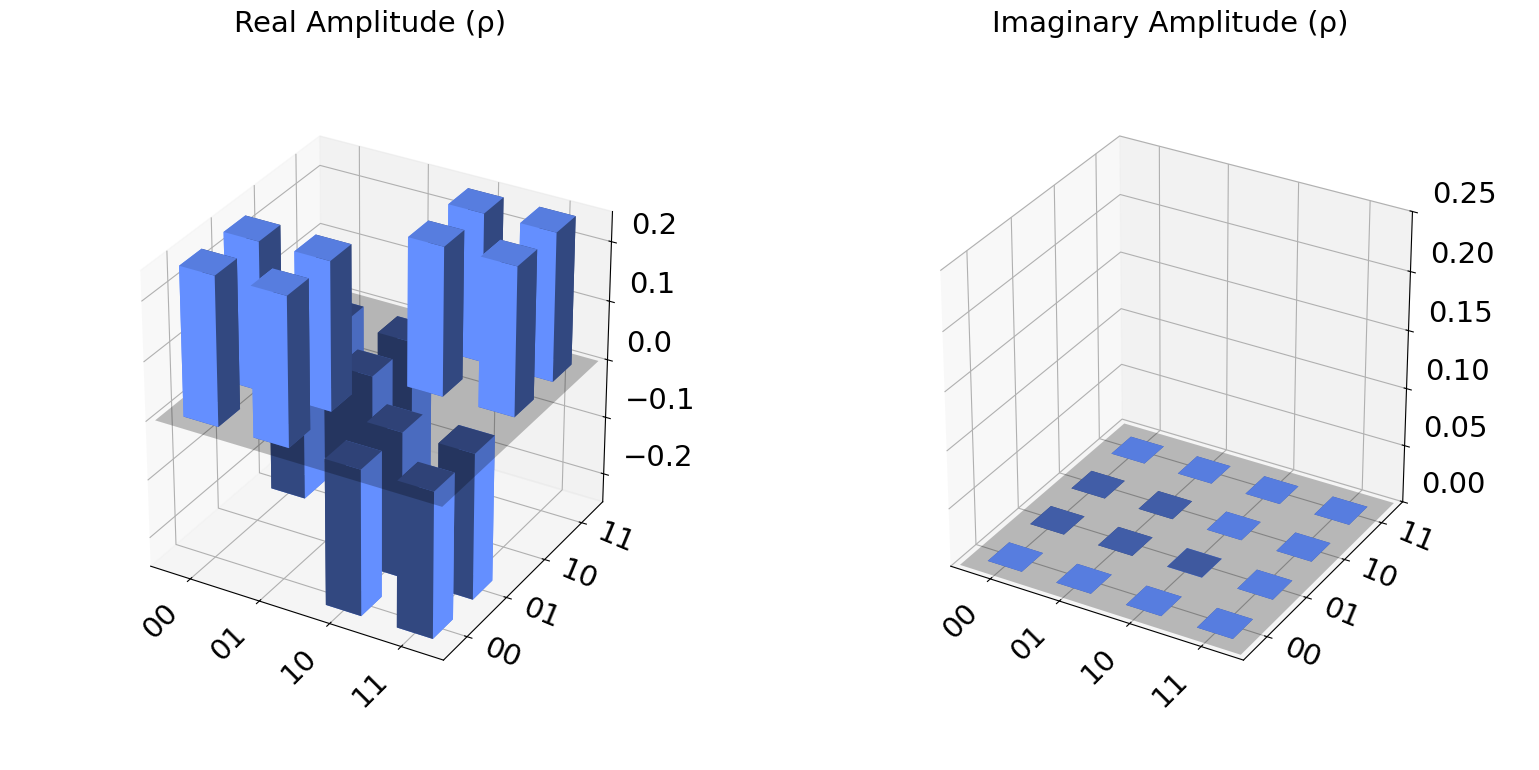

In [118]:
plot_state_city(final_state3)

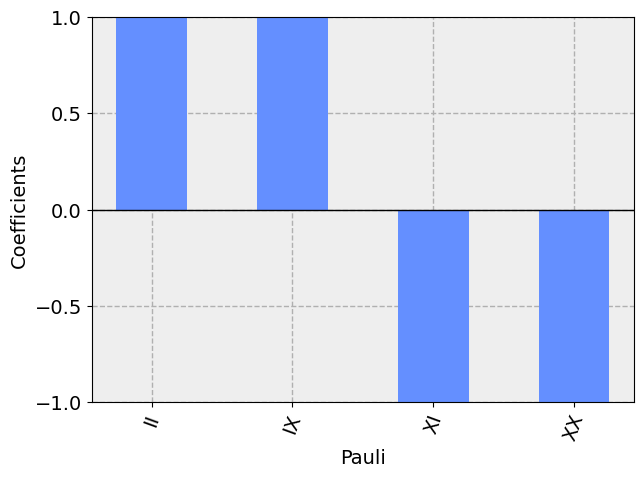

In [119]:
plot_state_paulivec(final_state3)

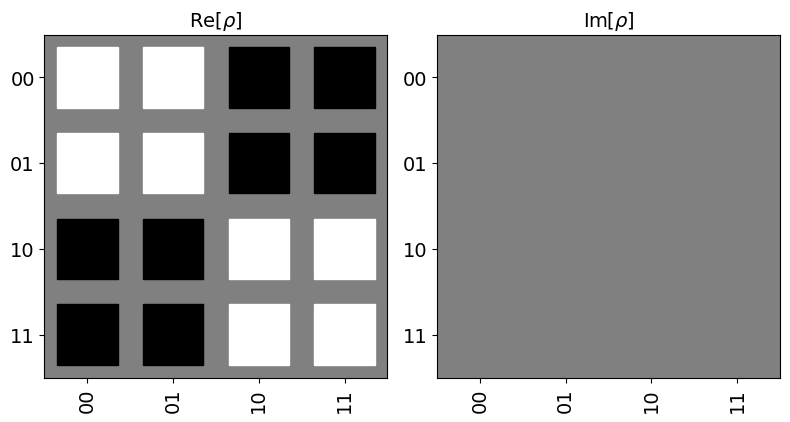

In [120]:
plot_state_hinton(final_state3)